# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df_clean = df_raw.dropna() 
print df_clean.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
print "FREQUENCY OF ADMISSION"
print df_clean.admit.value_counts().sort_index()
print "FREQUENCY OF PRESTIGE"
print df_clean.prestige.value_counts().sort_index()

FREQUENCY OF ADMISSION
0    271
1    126
Name: admit, dtype: int64
FREQUENCY OF PRESTIGE
1.0     61
2.0    148
3.0    121
4.0     67
Name: prestige, dtype: int64


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [4]:
dummies = pd.get_dummies(df_clean['prestige'])
df = df_clean.copy()
df['prestige_1'] = dummies.iloc[:,0] # keeping this here for now to make code below simpler
df['prestige_2'] = dummies.iloc[:,1]
df['prestige_3'] = dummies.iloc[:,2]
df['prestige_4'] = dummies.iloc[:,3]
df.head(10)

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0
5,1,760.0,3.00,2.0,0.0,1.0,0.0,0.0
6,1,560.0,2.98,1.0,1.0,0.0,0.0,0.0
7,0,400.0,3.08,2.0,0.0,1.0,0.0,0.0
8,1,540.0,3.39,3.0,0.0,0.0,1.0,0.0
9,0,700.0,3.92,2.0,0.0,1.0,0.0,0.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: n-1, where n is the number of different values

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [5]:
dummy_ranks = df

cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

prob = handCalc[handCalc.admit == 1].size/float(handCalc.size)
odds_ratio =  prob / (1-prob)
log_odds = np.log(odds_ratio)

print
print "ADMISSION - OVERALL"
print "Probability:", prob
print "Odds Ratio:", odds_ratio
print "Log Odds Ratio:", log_odds

# too lazy to copy paste & maintain code - so let's iterate instead
arr = [("TOP", "prestige_1"),("MID", "prestige_2"),("LOW", "prestige_3"),("WORST", "prestige_4")]

for a in arr:

    prob = handCalc[(handCalc.admit == 1) & (handCalc[a[1]] == 1)].size/float(handCalc[(handCalc[a[1]] == 1)].size)
    odds_ratio =  prob / (1-prob)
    log_odds = np.log(odds_ratio)

    print
    print "ADMISSION -",a[0],"PRESTIGE"
    print "Probability:", prob
    print "Odds Ratio:", odds_ratio
    print "Log Odds Ratio:", log_odds

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         0.0         0.0         1.0         0.0
1      1  660.0  3.67         0.0         0.0         1.0         0.0
2      1  800.0  4.00         1.0         0.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         0.0         1.0
4      0  520.0  2.93         0.0         0.0         0.0         1.0

ADMISSION - OVERALL
Probability: 0.317380352645
Odds Ratio: 0.464944649446
Log Odds Ratio: -0.765836913928

ADMISSION - TOP PRESTIGE
Probability: 0.540983606557
Odds Ratio: 1.17857142857
Log Odds Ratio: 0.164303051291

ADMISSION - MID PRESTIGE
Probability: 0.358108108108
Odds Ratio: 0.557894736842
Log Odds Ratio: -0.583584978048

ADMISSION - LOW PRESTIGE
Probability: 0.231404958678
Odds Ratio: 0.301075268817
Log Odds Ratio: -1.20039498298

ADMISSION - WORST PRESTIGE
Probability: 0.179104477612
Odds Ratio: 0.218181818182
Log Odds Ratio: -1.52242653544


In [6]:
# crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted

ctab = pd.crosstab(df['admit'], df['prestige_1'])
ctab

prestige_1,0.0,1.0
admit,,
0,243,28
1,93,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [7]:
print ctab.iloc[0,0] # no admission for non-top
print ctab.iloc[1,0] # admission for non-top prestige
print ctab.iloc[0,1] # no admission for top
print ctab.iloc[1,1] # admission for top prestige

prob = ctab.iloc[1,1]/float(ctab.iloc[0,1]+ctab.iloc[1,1])
odds_ratio =  prob / (1-prob)
log_odds = np.log(odds_ratio)

print
print "If you attended #1 college:"
print "Probability:", prob
print "Odds Ratio:", odds_ratio
print "Log Odds Ratio:", log_odds

odds_top = odds_ratio

243
93
28
33

If you attended #1 college:
Probability: 0.540983606557
Odds Ratio: 1.17857142857
Log Odds Ratio: 0.164303051291


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [8]:
prob = ctab.iloc[1,0]/float(ctab.iloc[0,0]+ctab.iloc[1,0])
odds_ratio =  prob / (1-prob)
log_odds = np.log(odds_ratio)

print
print "If you attended #1 college:"
print "Probability:", prob
print "Odds Ratio:", odds_ratio
print "Log Odds Ratio:", log_odds

odds_rest = odds_ratio


If you attended #1 college:
Probability: 0.276785714286
Odds Ratio: 0.382716049383
Log Odds Ratio: -0.960461950187


#### 3.3 Calculate the odds ratio

In [9]:
print "odds ratio"
print (odds_top / odds_rest)

odds ratio
3.07949308756


#### 3.4 Write this finding in a sentence: 

Answer: Your odds are 3 times higher for you to be accepted into grad school if you have graduated from a #1 ranked college

#### 3.5 Print the cross tab for prestige_4

In [10]:
ctab = pd.crosstab(df['admit'], df['prestige_4'])
ctab

prestige_4,0.0,1.0
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [11]:
print ctab.iloc[0,0] # no admission for non-bottom
print ctab.iloc[1,0] # admission for non-bottom prestige
print ctab.iloc[0,1] # no admission for bottom
print ctab.iloc[1,1] # admission for bottom prestige

prob = ctab.iloc[1,1]/float(ctab.iloc[0,1]+ctab.iloc[1,1])
odds_ratio =  prob / (1-prob)
log_odds = np.log(odds_ratio)

print
print "If you attended #4 college:"
print "Probability:", prob
print "Odds Ratio:", odds_ratio
print "Log Odds Ratio:", log_odds

odds_bottom = odds_ratio

prob = ctab.iloc[1,0]/float(ctab.iloc[0,0]+ctab.iloc[1,0])
odds_ratio =  prob / (1-prob)
log_odds = np.log(odds_ratio)

print
print "If you attended any non #4 college:"
print "Probability:", prob
print "Odds Ratio:", odds_ratio
print "Log Odds Ratio:", log_odds

odds_rest = odds_ratio

print
print "ODDS RATIO"
print odds_rest / odds_bottom

216
114
55
12

If you attended #4 college:
Probability: 0.179104477612
Odds Ratio: 0.218181818182
Log Odds Ratio: -1.52242653544

If you attended any non #4 college:
Probability: 0.345454545455
Odds Ratio: 0.527777777778
Log Odds Ratio: -0.63907995929

ODDS RATIO
2.41898148148


#### 3.7 Write this finding in a sentence

Answer: Your odds of admission are significantly lower if you only attended a #4 ranked college. If you did not attend a lowest ranked college, your odds are 2.4 times higher

## Part 4. Analysis

In [52]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':'prestige_3'])
print data.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3
0      0  380.0  3.61         0.0         0.0         1.0
1      1  660.0  3.67         0.0         0.0         1.0
2      1  800.0  4.00         1.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         0.0
4      0  520.0  2.93         0.0         0.0         0.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [53]:
# manually add the intercept
data['intercept'] = 1.0
print data.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  intercept
0      0  380.0  3.61         0.0         0.0         1.0        1.0
1      1  660.0  3.67         0.0         0.0         1.0        1.0
2      1  800.0  4.00         1.0         0.0         0.0        1.0
3      1  640.0  3.19         0.0         0.0         0.0        1.0
4      0  520.0  2.93         0.0         0.0         0.0        1.0


#### 4.1 Set the covariates to a variable called train_cols

In [59]:
train_cols = data[['gre','gpa','prestige_1','prestige_2','prestige_3', 'intercept']]

#### 4.2 Fit the model

In [60]:
y = data['admit']

log_lm = sm.Logit(y, train_cols)
result = log_lm.fit()


Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [61]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                 0.08166
Time:                        21:29:52   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.333      2.344      0.019         0.128     1.431
prestige_1     1.5534      0.417      3.721      0.000         0.735     2.372
prestige_2     0.8733      0.367      2.378      0.017         0.153     1.593
prestige_3     0.2147      0.393      0.547      0.584        -0.555     0.984
intercept     -5.4303      1.140     -4.764      0.000        -7.664    -3.196
==============================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [62]:
odds = np.exp(result.params)
conf_int = np.exp(result.conf_int())
conf_int.columns = ['2.5%', '97.5%']

print "ODDS RATIOS"
print odds
print
print "CONFIDENCE INTERVAL"
print conf_int

ODDS RATIOS
gre           1.002221
gpa           2.180027
prestige_1    4.727566
prestige_2    2.394738
prestige_3    1.239531
intercept     0.004382
dtype: float64

CONFIDENCE INTERVAL
                2.5%      97.5%
gre         1.000074   1.004372
gpa         1.136120   4.183113
prestige_1  2.085893  10.714780
prestige_2  1.165829   4.919050
prestige_3  0.574262   2.675498
intercept   0.000469   0.040919


In [58]:
conf = pd.DataFrame(columns=['OR'])
conf['OR'] = odds
conf = conf.join(conf_int)
conf

,OR,2.5%,97.5%
gre,1.002221,1.000074,1.004372
gpa,2.180027,1.136120,4.183113
prestige_1,4.727566,2.085893,10.714780
prestige_2,2.394738,1.165829,4.919050
prestige_3,1.239531,0.574262,2.675498
intercept,0.004382,0.000469,0.040919


#### 4.5 Interpret the OR of Prestige_2

Answer: It looks like the odds ratio for prestige_2 is higher than the lower ranking prestiges. This confirms with our theory that the higher prestige is more important than the lower ranking ones.

#### 4.6 Interpret the OR of GPA

Answer: The GPA odds ratio is the highest of all the covariates. This indicates that the gpa is the most influencial factor when it comes to improving the odds of admission.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [22]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [23]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print "GREs"
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print "GPAs"
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4]]))
combos.columns = ['gre', 'gpa', 'prestige']
print combos.head()

GREs
[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
GPAs
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
     gre       gpa  prestige
0  220.0  2.260000       1.0
1  220.0  2.260000       2.0
2  220.0  2.260000       3.0
3  220.0  2.260000       4.0
4  220.0  2.453333       1.0


#### 5.1 Recreate the dummy variables

In [24]:
# recreate the dummy variables

# keep only what we need for making predictions
dummies = pd.get_dummies(combos['prestige'])

combos = combos.copy()
#df_pred['prestige_1'] = dummies.iloc[:,0]
combos['prestige_2'] = dummies.iloc[:,1]
combos['prestige_3'] = dummies.iloc[:,2]
combos['prestige_4'] = dummies.iloc[:,3]

combos['intercept'] = 1.0

combos_clean = combos.drop('prestige', 1)

print combos_clean.head()

     gre       gpa  prestige_2  prestige_3  prestige_4  intercept
0  220.0  2.260000         0.0         0.0         0.0        1.0
1  220.0  2.260000         1.0         0.0         0.0        1.0
2  220.0  2.260000         0.0         1.0         0.0        1.0
3  220.0  2.260000         0.0         0.0         1.0        1.0
4  220.0  2.453333         0.0         0.0         0.0        1.0


#### 5.2 Make predictions on the enumerated dataset

In [25]:
prediction = result.predict(combos_clean)
print prediction

[ 0.16417268  0.09049221  0.04897733  0.03989032  0.1859065   0.10368189
  0.05649185  0.0460782   0.20979534  0.11854346  0.06508043  0.05317278
  0.2358645   0.1352139   0.07487112  0.06128953  0.26409041  0.15381956
  0.08599924  0.07055296  0.29439278  0.17446889  0.09860504  0.08109552
  0.32662888  0.1972441   0.11283051  0.09305572  0.36059095  0.22219218
  0.12881497  0.10657526  0.39600758  0.24931576  0.14668949  0.12179521
  0.43254958  0.27856456  0.16657006  0.1388509   0.18474274  0.10296774
  0.05608241  0.04574057  0.20852034  0.1177404   0.064613    0.05278605
  0.23447808  0.13431512  0.07433896  0.06084755  0.2625951   0.15281896
  0.08539529  0.07004917  0.29279415  0.17336148  0.09792205  0.08052298
  0.32493581  0.19602646  0.11206123  0.09240722  0.35881565  0.2208629
  0.12795243  0.10584354  0.3941654   0.24787592  0.14572728  0.12097314
  0.43065861  0.27701814  0.16550274  0.1379318   0.46792096  0.30818267
  0.18737316  0.15684362  0.20725106  0.11694205  0.

#### 5.3 Interpret findings for the last 4 observations

Answer: 
The last 4 predictions are the odds of students with perfect GRE (800) and GPA (4.0) scores making it into grad school with the four different rankings (from highest to lowest)

To be more specific:

Odds for #1 ranked school:  0.73403998

Odds for #2 ranked school:  0.58299512

Odds for #3 ranked school:  0.41983282 

Odds for #4 ranked school:  0.36860803




## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [26]:
combos_pred = combos
combos_pred['admit_odds'] = prediction
combos_pred.head()


,gre,gpa,prestige,prestige_2,prestige_3,prestige_4,intercept,admit_odds
0,220.0,2.260000,1.0,0.0,0.0,0.0,1.0,0.164173
1,220.0,2.260000,2.0,1.0,0.0,0.0,1.0,0.090492
2,220.0,2.260000,3.0,0.0,1.0,0.0,1.0,0.048977
3,220.0,2.260000,4.0,0.0,0.0,1.0,1.0,0.039890
4,220.0,2.453333,1.0,0.0,0.0,0.0,1.0,0.185907


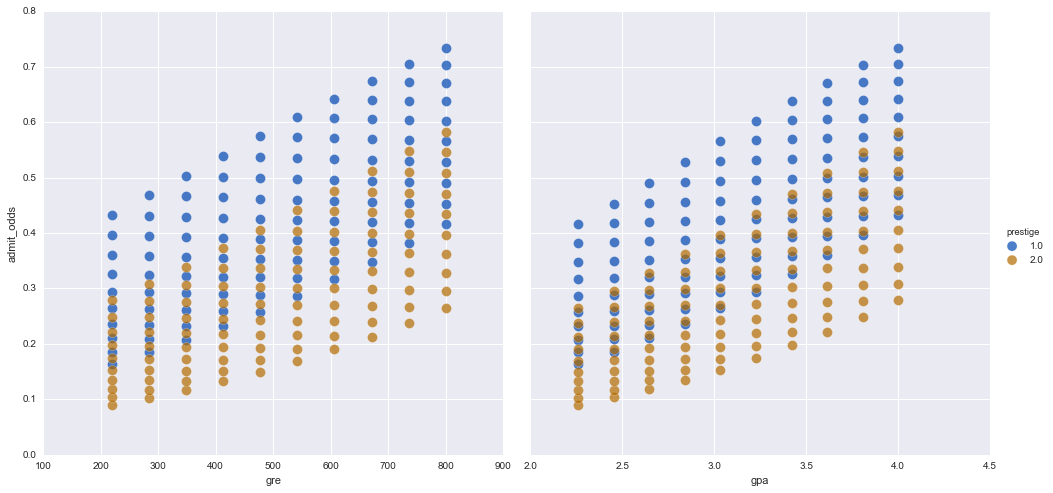

In [132]:
p= sns.hls_palette(2, l=.35, s=1, h=.6)

combos_pred_g = combos_pred[(combos_pred.prestige <= 2) ]

sns.pairplot(data=combos_pred_g,  x_vars=['gre','gpa'],  
    y_vars='admit_odds', size=7, hue='prestige', palette=p, plot_kws={'alpha':0.7, 's':100})

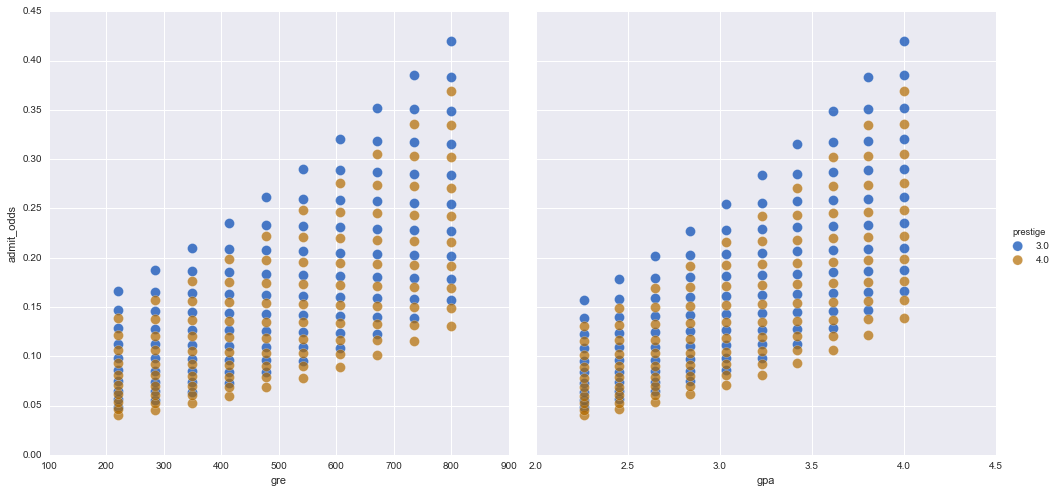

In [134]:
combos_pred_g = combos_pred[combos_pred.prestige > 2]

sns.pairplot(data=combos_pred_g,  x_vars=['gre','gpa'],  
    y_vars='admit_odds', size=7, hue='prestige', palette=p, plot_kws={'alpha':0.7, 's':100})

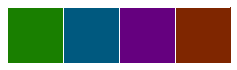

In [106]:
sns.palplot(sns.hls_palette(4, l=.25, s=1, h=.30))